In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# leer el archivo de excel
df = pd.read_excel('superstore.xlsx')

In [3]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

 - Transformar toda la columna Order Date a datetime

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<h1>Recency </h1>

In [6]:
# Calcula la fecha máxima de order Date
last_order_date = df['Order Date'].max()
last_order_date


Timestamp('2017-12-30 00:00:00')

<h1>Última orden por cada cliente </h1>

In [7]:
last_order = df.groupby('Customer ID')['Order Date'].max()
last_order

Customer ID
AA-10315   2017-06-29
AA-10375   2017-12-11
AA-10480   2017-04-15
AA-10645   2017-11-05
AB-10015   2016-11-10
              ...    
XP-21865   2017-11-17
YC-21895   2017-12-26
YS-21880   2017-12-21
ZC-21910   2017-11-06
ZD-21925   2017-06-11
Name: Order Date, Length: 793, dtype: datetime64[ns]

<h1>Resta entre fechas </h1>

In [8]:
resta = last_order_date - last_order
resta

Customer ID
AA-10315   184 days
AA-10375    19 days
AA-10480   259 days
AA-10645    55 days
AB-10015   415 days
             ...   
XP-21865    43 days
YC-21895     4 days
YS-21880     9 days
ZC-21910    54 days
ZD-21925   202 days
Name: Order Date, Length: 793, dtype: timedelta64[ns]

<h1>Monetary</h1>

In [9]:
how_much_sales = df.groupby('Customer ID')['Sales'].sum()

In [10]:
how_much_sales.head()

Customer ID
AA-10315    5563.560
AA-10375    1056.390
AA-10480    1790.512
AA-10645    5086.935
AB-10015     886.156
Name: Sales, dtype: float64

<h1>Frecuency </h1>

In [11]:
quantity = df.groupby('Customer ID')['Quantity'].sum()
quantity.head()

Customer ID
AA-10315    30
AA-10375    41
AA-10480    36
AA-10645    64
AB-10015    13
Name: Quantity, dtype: int64

In [12]:
new_df = pd.concat([resta, how_much_sales, quantity], axis=1)
#df['frequency'] = df[quantity]
print(new_df)

            Order Date     Sales  Quantity
Customer ID                               
AA-10315      184 days  5563.560        30
AA-10375       19 days  1056.390        41
AA-10480      259 days  1790.512        36
AA-10645       55 days  5086.935        64
AB-10015      415 days   886.156        13
...                ...       ...       ...
XP-21865       43 days  2374.658       100
YC-21895        4 days  5454.350        31
YS-21880        9 days  6720.444        58
ZC-21910       54 days  8025.707       105
ZD-21925      202 days  1493.944        32

[793 rows x 3 columns]


In [13]:
# transform timedelta to int
new_df['Order Date'] = new_df['Order Date'].dt.days
new_df.head()

,Order Date,Sales,Quantity
Customer ID,,,
AA-10315,184,5563.560,30
AA-10375,19,1056.390,41
AA-10480,259,1790.512,36
AA-10645,55,5086.935,64
AB-10015,415,886.156,13


In [14]:
new_df.dtypes

Order Date      int64
Sales         float64
Quantity        int64
dtype: object

In [15]:
# Crear lista de etiquetas para las columnas
recency_labels = ['Más Reciente', 'Reciente', 'Antiguo', 'Más Antiguo']
frecuency_labels = ['Menos Frecuente', 'Frecuente', 'Muy Frecuente', 'Más Frecuente']
monetary_labels = ['Menos Gasto', 'Gasto', 'Mucho Gasto', 'Más Gasto']

In [16]:
# Crear una nueva tabla para las etiquetas
new_df['R'] = pd.qcut(new_df['Order Date'], q=4, labels=recency_labels)
new_df['F'] = pd.qcut(new_df['Quantity'], q=4, labels=frecuency_labels)
new_df['M'] = pd.qcut(new_df['Sales'], q=4, labels=monetary_labels)

In [17]:
new_df.head()

,Order Date,Sales,Quantity,R,F,M
Customer ID,,,,,,
AA-10315,184,5563.560,30,Más Antiguo,Menos Frecuente,Más Gasto
AA-10375,19,1056.390,41,Más Reciente,Frecuente,Menos Gasto
AA-10480,259,1790.512,36,Más Antiguo,Frecuente,Gasto
AA-10645,55,5086.935,64,Reciente,Más Frecuente,Más Gasto
AB-10015,415,886.156,13,Más Antiguo,Menos Frecuente,Menos Gasto


In [18]:

new_df.sample(6)

,Order Date,Sales,Quantity,R,F,M
Customer ID,,,,,,
RM-19750,299,98.350,4,Más Antiguo,Menos Frecuente,Menos Gasto
JO-15145,57,3254.949,59,Reciente,Muy Frecuente,Mucho Gasto
PO-19180,160,4893.043,65,Antiguo,Más Frecuente,Más Gasto
DB-13360,264,1081.466,28,Más Antiguo,Menos Frecuente,Menos Gasto
AR-10570,534,88.150,6,Más Antiguo,Menos Frecuente,Menos Gasto
SV-20935,2,1903.491,66,Más Reciente,Más Frecuente,Gasto


In [19]:
# Cambiar el orden de las columnas
new_df = new_df[['Order Date', 'R', 'Sales', 'M', 'Quantity', 'F']]

In [20]:
new_df.sample(10)

,Order Date,R,Sales,M,Quantity,F
Customer ID,,,,,,
AH-10465,230,Más Antiguo,2495.3916,Mucho Gasto,35,Frecuente
NZ-18565,85,Antiguo,2488.3100,Mucho Gasto,77,Más Frecuente
DK-13150,10,Más Reciente,797.8320,Menos Gasto,20,Menos Frecuente
BB-10990,105,Antiguo,744.3400,Menos Gasto,26,Menos Frecuente
GB-14575,13,Más Reciente,4716.2880,Más Gasto,63,Muy Frecuente
SG-20890,226,Más Antiguo,47.9460,Menos Gasto,17,Menos Frecuente
GM-14440,83,Antiguo,3582.8200,Mucho Gasto,43,Frecuente
MS-17770,121,Antiguo,3144.6780,Mucho Gasto,73,Más Frecuente
FA-14230,97,Antiguo,2984.0540,Mucho Gasto,58,Muy Frecuente


c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sales', ylabel='M'>

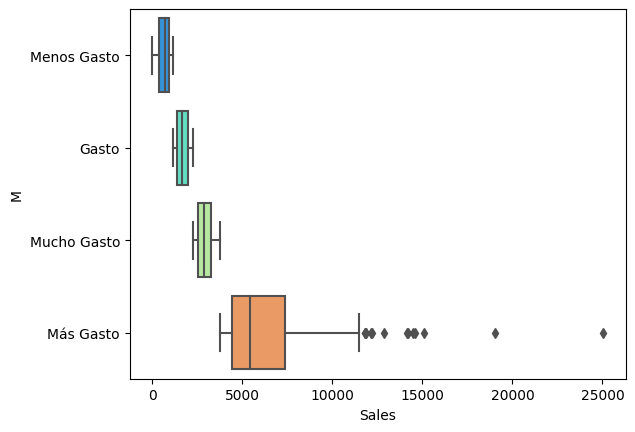

In [21]:
sns.boxplot(x='Sales', y='M', data=new_df, palette='rainbow')

In [30]:
mediana_sales = new_df['Sales'].median()

In [31]:
mediana_sales

2256.3940000000002

In [28]:
cantidad_cliente_de_mucho_gasto = new_df[new_df['M'] == 'Más Gasto' ].value_counts()

In [29]:
cantidad_cliente_de_mucho_gasto

Order Date  R             Sales       M          Quantity  F            
1           Más Reciente  3805.7140   Más Gasto  45        Muy Frecuente    1
84          Antiguo       4867.2000   Más Gasto  88        Más Frecuente    1
90          Antiguo       4358.1280   Más Gasto  41        Frecuente        1
92          Antiguo       6491.0260   Más Gasto  87        Más Frecuente    1
95          Antiguo       3949.6560   Más Gasto  104       Más Frecuente    1
                                                                           ..
36          Reciente      4159.7700   Más Gasto  54        Muy Frecuente    1
                          11820.1200  Más Gasto  106       Más Frecuente    1
                          11891.7510  Más Gasto  59        Muy Frecuente    1
37          Reciente      4256.2720   Más Gasto  65        Más Frecuente    1
1035        Más Antiguo   3984.4524   Más Gasto  57        Muy Frecuente    1
Name: count, Length: 198, dtype: int64

In [32]:
new_df['Quantity'].mean() 

47.75914249684742

In [37]:
# Como añadir dos condiciones a un dataframe
new_df[(new_df['M'] == 'Más Gasto') & (new_df['F'] == 'Más Frecuente')]

,Order Date,R,Sales,M,Quantity,F,clientes_frecuentes
Customer ID,,,,,,,
AA-10645,55,Reciente,5086.935,Más Gasto,64,Más Frecuente,True
AB-10105,41,Reciente,14473.571,Más Gasto,73,Más Frecuente,True
AG-10900,96,Antiguo,4510.797,Más Gasto,92,Más Frecuente,True
AH-10690,410,Más Antiguo,7888.294,Más Gasto,102,Más Frecuente,True
AI-10855,13,Más Reciente,4375.786,Más Gasto,72,Más Frecuente,True
...,...,...,...,...,...,...,...
TT-21070,31,Reciente,4915.602,Más Gasto,66,Más Frecuente,True
VD-21670,581,Más Antiguo,6442.254,Más Gasto,71,Más Frecuente,True
VW-21775,28,Más Reciente,6134.038,Más Gasto,77,Más Frecuente,True


In [33]:
new_df['clientes_frecuentes'] = new_df['Quantity']>new_df['Quantity'].mean()

In [34]:
new_df.head()

,Order Date,R,Sales,M,Quantity,F,clientes_frecuentes
Customer ID,,,,,,,
AA-10315,184,Más Antiguo,5563.560,Más Gasto,30,Menos Frecuente,False
AA-10375,19,Más Reciente,1056.390,Menos Gasto,41,Frecuente,False
AA-10480,259,Más Antiguo,1790.512,Gasto,36,Frecuente,False
AA-10645,55,Reciente,5086.935,Más Gasto,64,Más Frecuente,True
AB-10015,415,Más Antiguo,886.156,Menos Gasto,13,Menos Frecuente,False


In [36]:
new_df['M'].value_counts()

M
Menos Gasto    199
Gasto          198
Mucho Gasto    198
Más Gasto      198
Name: count, dtype: int64

In [35]:
# A cuanta gente tenemos que llamar de la columna cliente_frecuentes que esten false
new_df['clientes_frecuentes'].value_counts()

clientes_frecuentes
False    436
True     357
Name: count, dtype: int64